In [119]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

In [120]:
# Data from https://www.theatlas.com/charts/HJrdxDNKW
got_data = pd.read_csv('got_data/got_screentime.csv')
got_data.head()

,Character,Minutes
0,Jon Snow,338
1,Tyrion Lannister,337
2,Daenerys Targaryen,276
3,Sansa Stark,239
4,Cersei Lannister,236


In [121]:
# Got the 8.3 Cast list from http://time.com/5542922/game-of-thrones-season-8-battle-of-winterfell/
# Checking the data lines up
x = got_data['Character'].values
cast = ['Jon Snow','Daenerys Targaryen','Tyrion Lannister','Sansa Stark','Arya Stark',
       'Bran Stark','Theon Greyjoy','Brienne of Tarth','Jaime Lannister','Podrick Payne',
       'Gendry','Tormund','Davos Seaworth','Melisandre','Grey Worm','Missandei',
       'Eddison Tollett','Samwell Tarly','Gilly','Varys','Jorah Mormont','Lyanna Mormont',
       'Sandor Clegane','Beric Dondarrion','The Night King']
for person in cast:
    if person not in x:
        print(person)

In [122]:
def is_dead(row):
    if '*' in row['Character']:
        return True
    else:
        return False
    
def is_in_battle_of_winterfell(row):
    cast = ['Jon Snow','Daenerys Targaryen','Tyrion Lannister','Sansa Stark','Arya Stark',
           'Bran Stark','Theon Greyjoy','Brienne of Tarth','Jaime Lannister','Podrick Payne',
           'Gendry','Tormund','Davos Seaworth','Melisandre','Grey Worm','Missandei',
           'Eddison Tollett','Samwell Tarly','Gilly','Varys','Jorah Mormont','Lyanna Mormont',
           'Sandor Clegane','Beric Dondarrion','The Night King']
    if row['Character'] in cast:
        return True
    else:
        return False
    
got_data['Dead'] = got_data.apply (lambda row: is_dead(row), axis=1)
got_data['8.3'] = got_data.apply (lambda row: is_in_battle_of_winterfell(row), axis=1)
got_data.head()

,Character,Minutes,Dead,8.3
0,Jon Snow,338,False,True
1,Tyrion Lannister,337,False,True
2,Daenerys Targaryen,276,False,True
3,Sansa Stark,239,False,True
4,Cersei Lannister,236,False,False


In [123]:
dead_people = got_data[got_data.Dead == True]
dead_people.head()

,Character,Minutes,Dead,8.3
10,Petyr Baelish*,119,True,False
12,Ned Stark*,100,True,False
17,Catelyn Stark*,83,True,False
18,Tywin Lannister*,78,True,False
19,Margaery Tyrell*,78,True,False


In [124]:
with open('got_data/death_dict.pickle', 'rb') as handle:
    death_dict = pickle.load(handle)

In [125]:
# Extra death times found from https://www.businessinsider.com/game-of-thrones-everyone-who-has-died-season-7-2017-8
# and https://gameofthrones.fandom.com/wiki/
dead_x = dead_people['Character'].values

def death_episode(row):
    name = row['Character'][:-1]
    try:
        ep = death_dict[name]
    except KeyError:
        # extra dict looked up from Wiki
        # There are 45 episodes up to season 7
        # Most of these are naming conventions or season 7 deaths
        extra_death_dict = {
            'Petyr Baelish':67,
            'Ned Stark': 6,
            'Shireen Baratheon': 49,
            'Barristan Selmy':44,
            'Olenna Tyrell':63, 
            'Talisa': 29,
            'Thoros of Myr':66,
            'Maester Aemon': 47,
            'Benjen Stark': 66,
            'Tyene Sand':63,
            'Randyll Tarly': 65,
            'Qhorin Halfhand': 20,
            'Three-Eyed Raven':55,
            'Nymeria Sand':63,
            'Obara Sand':63,
            'Wun Wun':59,
            'Craster':24,
            'Brother Ray':57,
            'Septa Mordane':8,
            'Spice King':17,
            'Dagmer Cleftjaw':20,
            'Khal Moro':54,
            'Rickard Karstark':25,
            'Rattleshirt':48          
        }
        try:
            ep = extra_death_dict[name]
        except KeyError:
            ep = None
    return(ep)

dead_people['Ep'] = dead_people.apply (lambda row: death_episode(row), axis=1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
dead_people['MinPerEp'] = round(dead_people['Minutes']/dead_people['Ep'],3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
dead_people.head()

,Character,Minutes,Dead,8.3,Ep,MinPerEp
10,Petyr Baelish*,119,True,False,67,1.776
12,Ned Stark*,100,True,False,6,16.667
17,Catelyn Stark*,83,True,False,19,4.368
18,Tywin Lannister*,78,True,False,30,2.600
19,Margaery Tyrell*,78,True,False,60,1.300


In [128]:
dead_people.sort_values('MinPerEp', ascending=False)

,Character,Minutes,Dead,8.3,Ep,MinPerEp
12,Ned Stark*,100,True,False,6,16.667
126,Will*,6,True,False,1,6.000
43,Robert Baratheon*,31,True,False,7,4.429
17,Catelyn Stark*,83,True,False,19,4.368
20,Robb Stark*,77,True,False,19,4.053
64,Viserys Targaryen*,21,True,False,6,3.500
23,Joffrey Baratheon*,70,True,False,22,3.182
18,Tywin Lannister*,78,True,False,30,2.600
53,Khal Drogo*,25,True,False,11,2.273
10,Petyr Baelish*,119,True,False,67,1.776


In [129]:
import matplotlib
font = {'family' : 'Verdana',
        'size'   : 22}	
matplotlib.rc('font', **font)

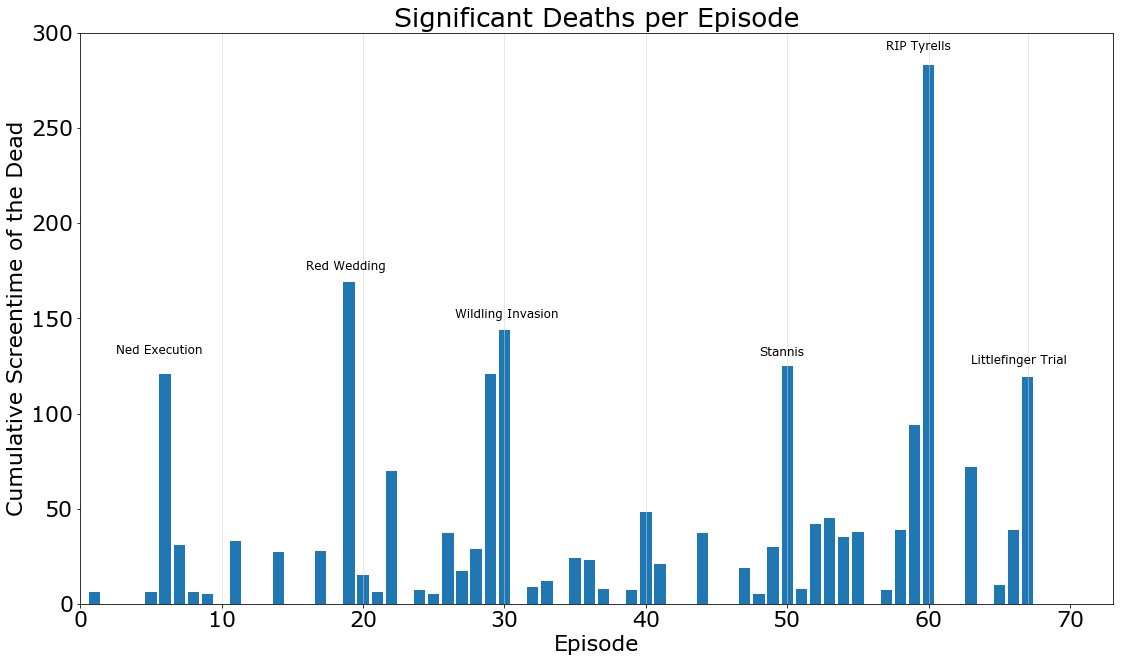

In [130]:
death_val = dead_people.groupby(['Ep'])['Minutes'].agg('sum')

ned_vis_execution = 6
ned_vis_score = 130

red_wedding = 19
red_wedding_score = 175

wilding_invasion = 29
wilding_score =150

stannis_myrcella = 50
stannis_score = 130

tyrell_death = 60
tyrell_score = 290


littlefinger_death = 68
littlefinger_score = 125

for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,400],color='lightgrey',linewidth=0.5)
plt.bar(death_val.index,death_val.values)
plt.xlim([0,73])
plt.ylim(top=300)
plt.title('Significant Deaths per Episode')
plt.ylabel('Cumulative Screentime of the Dead')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3.5,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(wilding_invasion-2.5,wilding_score+0.5, 'Wildling Invasion',fontsize=12)
plt.text(stannis_myrcella-2,stannis_score+0.5, 'Stannis',fontsize=12)
plt.text(tyrell_death-3,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.text(littlefinger_death-5,littlefinger_score+1, 'Littlefinger Trial',fontsize=12)
plt.savefig('got_screentime.png')
plt.show()

In [131]:
death_val = dead_people.groupby(['Ep'])['MinPerEp'].agg('sum')

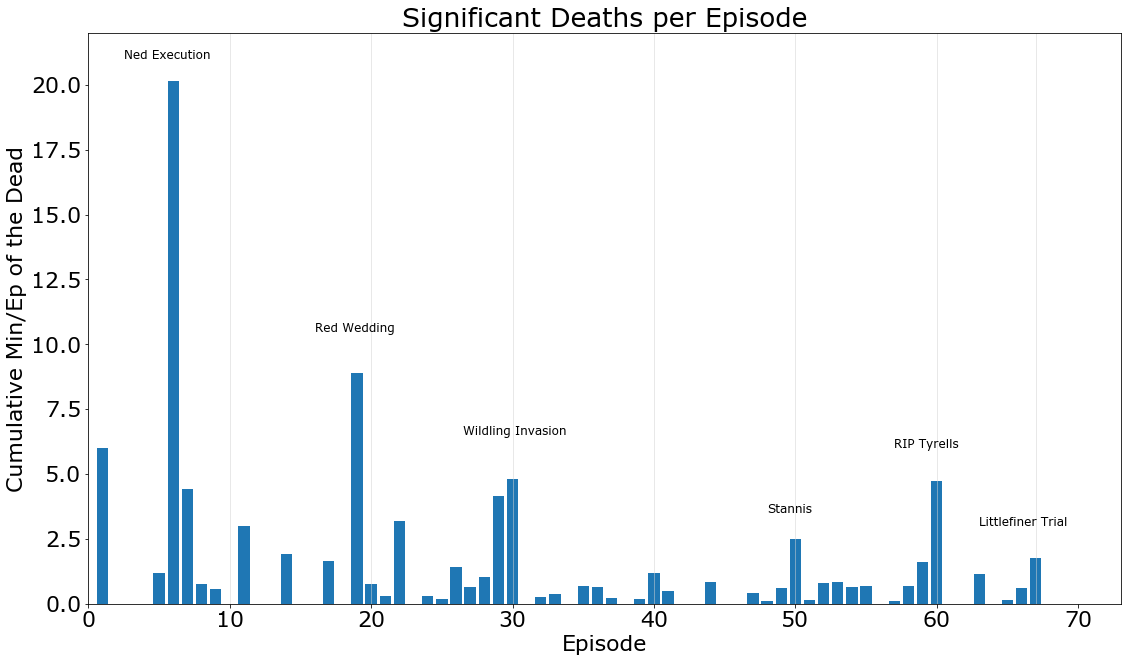

In [132]:
# Season Lines found from https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes


ned_vis_execution = 6
ned_vis_score = 20

red_wedding = 19
red_wedding_score = 10

wilding_invasion = 29
wilding_score =6

stannis_myrcella = 50
stannis_score = 3

tyrell_death = 60
tyrell_score = 6


littlefinger_death = 68
littlefinger_score = 2

for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,22],color='lightgrey',linewidth=0.5)
plt.bar(death_val.index,death_val.values)
plt.ylim(top=22)
plt.xlim([0,73])
plt.gcf().set_size_inches(18.5, 10.5)
plt.title('Significant Deaths per Episode')
plt.ylabel('Cumulative Min/Ep of the Dead')
plt.xlabel('Episode')

plt.text(ned_vis_execution-3.5,ned_vis_score+1, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(wilding_invasion-2.5,wilding_score+0.5, 'Wildling Invasion',fontsize=12)
plt.text(stannis_myrcella-2,stannis_score+0.5, 'Stannis',fontsize=12)
plt.text(tyrell_death-3,tyrell_score, 'RIP Tyrells',fontsize=12)
plt.text(littlefinger_death-5,littlefinger_score+1, 'Littlefiner Trial',fontsize=12)
plt.savefig('got_minperep.png')

plt.show()

In [133]:
# I don't think the Death Value here is reflective, because I 
# essentially make deaths N episodes in N times more shocking/valuable
# to register-- which is somewhat true but not so strict

# I mean currently the Red Wedding is half as intense as 
# Ned Stark's death. Which just isn't fair

# This is essentially punishing someone for being killed late in the season, and 
# rewarding someone for dying early.

In [134]:
# Trying a second metric that gives you 2 minutes of screen time per episode you survive:
dead_people['DeathValue2'] = round(
    (dead_people['Minutes']+2*(dead_people['Ep']-1))
    /dead_people['Ep'],3)
dead_people.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Character,Minutes,Dead,8.3,Ep,MinPerEp,DeathValue2
10,Petyr Baelish*,119,True,False,67,1.776,3.746
12,Ned Stark*,100,True,False,6,16.667,18.333
17,Catelyn Stark*,83,True,False,19,4.368,6.263
18,Tywin Lannister*,78,True,False,30,2.600,4.533
19,Margaery Tyrell*,78,True,False,60,1.300,3.267


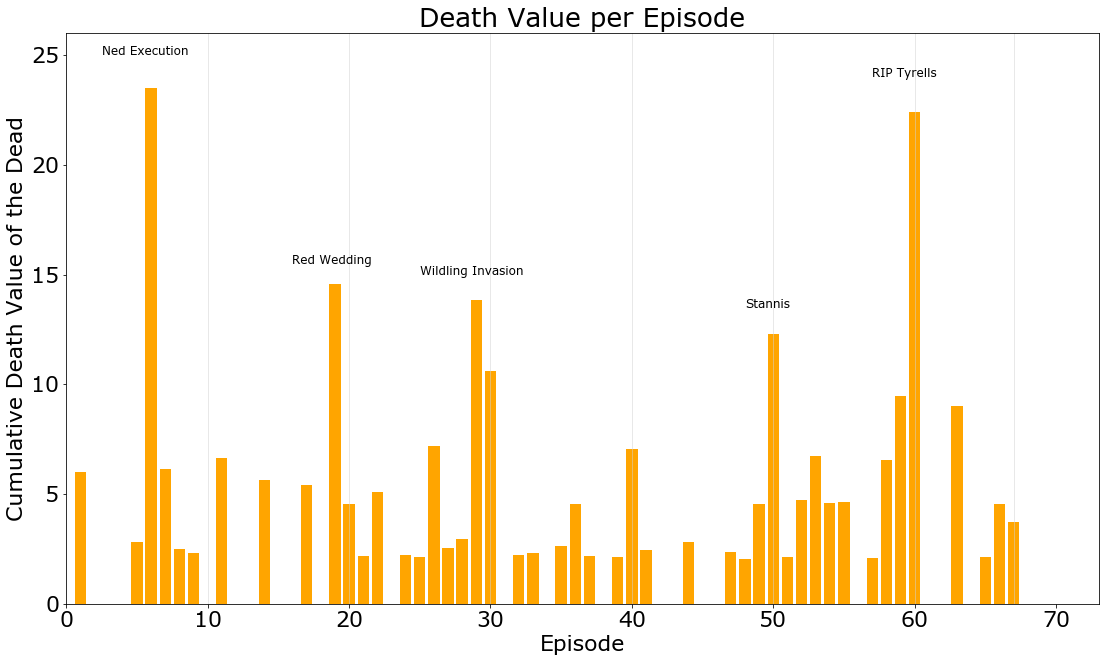

In [135]:
death_val2 = dead_people.groupby(['Ep'])['DeathValue2'].agg('sum')

ned_vis_execution = 6
ned_vis_score = 24

red_wedding = 19
red_wedding_score = 15

wilding_invasion = 29
wilding_score = 14.5

stannis_myrcella = 50
stannis_score = 13

tyrell_death = 60
tyrell_score = 24



for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val2.index,death_val2.values, label='DeathValue2', color='orange')
plt.ylim(top=26)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value of the Dead')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3.5,ned_vis_score+1, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(wilding_invasion-4,wilding_score+0.5, 'Wildling Invasion',fontsize=12)
plt.text(stannis_myrcella-2,stannis_score+0.5, 'Stannis',fontsize=12)
plt.text(tyrell_death-3,tyrell_score, 'RIP Tyrells',fontsize=12)
plt.savefig('got_deathvalue2.png')
plt.show()

In [136]:
dead_people.sort_values('DeathValue2',ascending=False)

,Character,Minutes,Dead,8.3,Ep,MinPerEp,DeathValue2
12,Ned Stark*,100,True,False,6,16.667,18.333
17,Catelyn Stark*,83,True,False,19,4.368,6.263
43,Robert Baratheon*,31,True,False,7,4.429,6.143
126,Will*,6,True,False,1,6.000,6.000
20,Robb Stark*,77,True,False,19,4.053,5.947
64,Viserys Targaryen*,21,True,False,6,3.500,5.167
23,Joffrey Baratheon*,70,True,False,22,3.182,5.091
18,Tywin Lannister*,78,True,False,30,2.600,4.533
53,Khal Drogo*,25,True,False,11,2.273,4.091
10,Petyr Baelish*,119,True,False,67,1.776,3.746


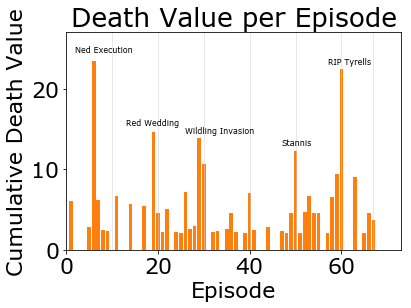

In [137]:
ned_vis_execution = 6
ned_vis_score = 23

red_wedding = 19
red_wedding_score = 15

wilding_invasion = 29
wilding_score =14

stannis_myrcella = 50
stannis_score = 12.5

tyrell_death = 60
tyrell_score = 22

death_val2 = dead_people.groupby(['Ep'])['DeathValue2'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val.index,death_val.values, label='DeathValue1')
plt.bar(death_val2.index,death_val2.values, label='DeathValue2')
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.text(ned_vis_execution-4,ned_vis_score+1.5, 'Ned Execution',fontsize=8)
plt.text(red_wedding-6,red_wedding_score+0.5, 'Red Wedding',fontsize=8)
plt.text(wilding_invasion-3,wilding_score+0.5, 'Wildling Invasion',fontsize=8)
plt.text(stannis_myrcella-3,stannis_score+0.5, 'Stannis',fontsize=8)
plt.text(tyrell_death-3,tyrell_score+1, 'RIP Tyrells',fontsize=8)
plt.show()

In [138]:
# Calling this the "Will Dilemma" because 
# Will is apparently the 2nd most important death in GoT because he is killed in the first
# episode after 6 minutes

In [139]:
# Found a Popularity Score: https://data.world/data-society/game-of-thrones 
# Essentially counted the number of links on the wiki page and normalized it 
# They consider people over .34 score as popular
# Adding to dataset

In [140]:
char_pd = pd.read_csv('got_data/character-predictions.csv')
pop_pd = char_pd[['name','popularity']]
pop_pd.head()

,name,popularity
0,Viserys II Targaryen,0.605351
1,Walder Frey,0.896321
2,Addison Hill,0.267559
3,Aemma Arryn,0.183946
4,Sylva Santagar,0.043478


In [141]:
name_mismatch_fix_dict = {
    'Ned Stark':1.0,
    'Ramsay Bolton':0.461538,
    'Olenna Tyrell':1.0,
    'Grand Maester Pycelle':0.638796,
    'Robert Baratheon':0.65,
    'Talisa':0.65,
    'Thoros of Myr':100,
    'Khal Drogo':0.558528,
    'Maester Luwin':0.351171,
    'Ros':0.1,
    'Maester Aemon':0.311037,
    'Locke':0.06,
    'Myranda':0.06,
    'The Waif':0.06,
    'Olly':0.401338,
    'Selyse Baratheon':0.397993,
    'Karl Tanner':0.06,
    'Lady Crane':0.473244,
    'Alton Lannister':0.26622,
    'Three-Eyed Raven':0.26622,
    'Wun Wun':0.26622,
    'Razdal mo Eraz':0.1137,
    'Brother Ray':0.1137,
    'Septa Mordane':0.12319,
    'Spice King':0.12319,
    'Dagmer Cleftjaw':0.12319,
    'Khal Moro':0.12319,
    'Rattleshirt':0.12319
}
# Naming Mismatches:
kaggle_names = pop_pd.name.values
death_names = [dead_name[:-1] for dead_name in dead_people.Character.values]
for name in death_names:
    if name not in kaggle_names:
        name_mismatch_fix_dict[name]

In [142]:
pop_pd[pop_pd['name'] == 'Catelyn Stark']['popularity'] = 1.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
char_pd = pd.read_csv('got_data/character-predictions.csv')
pop_pd = char_pd[['name','popularity']]

name_mismatch_fix_dict = {
    'Ned Stark':1.0,
    'Ramsay Bolton':0.461538,
    'Olenna Tyrell':0.65,
    'Grand Maester Pycelle':0.638796,
    'Robert Baratheon':0.65,
    'Talisa':0.65,
    'Thoros of Myr':0.230769,
    'Khal Drogo':0.558528,
    'Maester Luwin':0.351171,
    'Ros':0.1,
    'Maester Aemon':0.311037,
    'Locke':0.06,
    'Myranda':0.06,
    'The Waif':0.06,
    'Olly':0.401338,
    'Selyse Baratheon':0.397993,
    'Karl Tanner':0.06,
    'Lady Crane':0.473244,
    'Alton Lannister':0.26622,
    'Three-Eyed Raven':0.26622,
    'Wun Wun':0.26622,
    'Razdal mo Eraz':0.1137,
    'Brother Ray':0.1137,
    'Septa Mordane':0.12319,
    'Spice King':0.12319,
    'Dagmer Cleftjaw':0.12319,
    'Khal Moro':0.12319,
    'Rattleshirt':0.12319
}

def get_importance_score(row):
    char_name = row['Character']
    if '*' in char_name:
        char_name = char_name[:-1]
        
    if char_name == 'Catelyn Stark':
        return(1.0)
    elif char_name == 'Lysa Arryn':
        return(0.473244)
    temp_pd = pop_pd[pop_pd.name==char_name]
    if temp_pd.shape[0] == 0:
        pop = name_mismatch_fix_dict[char_name]
    else:
        pop = temp_pd.popularity.values[0]
    
    return(pop)
  
# This only works for Dead People (currently)
dead_people['popularity'] = dead_people.apply (lambda row: get_importance_score(row), axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [144]:
dead_people['DeathValue3'] = round(
    (dead_people['Minutes']+2*dead_people['Ep'])
    /dead_people['Ep']*dead_people['popularity'],3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [145]:
dead_people[dead_people.Character =='Hodor*']

,Character,Minutes,Dead,8.3,Ep,MinPerEp,DeathValue2,popularity,DeathValue3
46,Hodor*,30,True,False,55,0.545,2.509,0.244147,0.621


In [146]:
dead_people.sort_values('popularity', ascending=False)

,Character,Minutes,Dead,8.3,Ep,MinPerEp,DeathValue2,popularity,DeathValue3
10,Petyr Baelish*,119,True,False,67,1.776,3.746,1.000000,3.776
22,Stannis Baratheon*,73,True,False,50,1.460,3.420,1.000000,3.460
58,Renly Baratheon*,24,True,False,35,0.686,2.629,1.000000,2.686
38,Barristan Selmy*,37,True,False,44,0.841,2.795,1.000000,2.841
34,Tommen Baratheon*,43,True,False,60,0.717,2.683,1.000000,2.717
23,Joffrey Baratheon*,70,True,False,22,3.182,5.091,1.000000,5.182
12,Ned Stark*,100,True,False,6,16.667,18.333,1.000000,18.667
20,Robb Stark*,77,True,False,19,4.053,5.947,1.000000,6.053
19,Margaery Tyrell*,78,True,False,60,1.300,3.267,1.000000,3.300
18,Tywin Lannister*,78,True,False,30,2.600,4.533,1.000000,4.600


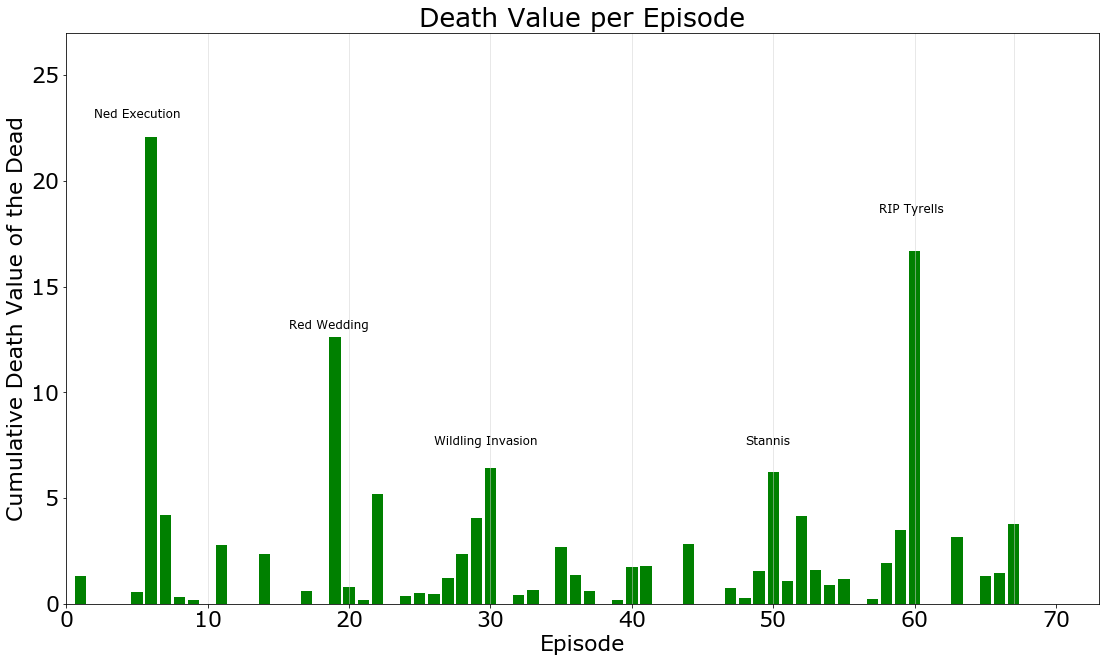

In [147]:
ned_vis_execution = 6
ned_vis_score = 21.5

red_wedding = 19
red_wedding_score = 12.5

wilding_invasion = 29
wilding_score =7

stannis_myrcella = 50
stannis_score = 7

tyrell_death = 60
tyrell_score = 17.5

death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='green')
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value of the Dead')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-4,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3.25,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(wilding_invasion-3,wilding_score+0.5, 'Wildling Invasion',fontsize=12)
plt.text(stannis_myrcella-2,stannis_score+0.5, 'Stannis',fontsize=12)
plt.text(tyrell_death-2.5,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.savefig('got_deathvalue3.png')
plt.show()

In [148]:
# This looks even better -- BUT there is now a major confounding variable added to this whole mess:
# Book vs. Movie
# Characters that play larger roles in the Book no longer exist (Rickard Stark), and characters in the show 
# that matter greatly (Ramsay Bolton) and not as important in the book... Let's look at how this popularity score
# stacks up against screentime:

In [149]:
def get_book_popularity(row):
    
    char_name = row['Character']
    if '*' in char_name:
        char_name = char_name[:-1]
        
        
        
    # Some names are just mislabelled... nobody's perfect!
    if (char_name == 'Catelyn Stark') or (char_name == 'Brienne of Tarth'):
        return(1.0)

    temp_pd = pop_pd[pop_pd.name==char_name]
    
    # If not in dataset
    if temp_pd.shape[0] == 0:
        try:
            pop = name_mismatch_fix_dict[char_name]
        except KeyError:
            print(name)
            pop = 0.0
            
    else:
        pop = temp_pd.popularity.values[0]
    
    return(pop)

got_data['book_popularity'] = got_data.apply (lambda row: get_book_popularity(row), axis=1)

Qotho
Qotho
Qotho
Qotho
Qotho
Qotho
Qotho
Qotho


In [150]:
got_data['Ep'] = got_data.apply (lambda row: death_episode(row), axis=1)
got_data['movie_popularity'] = got_data['Minutes']/got_data['Ep']

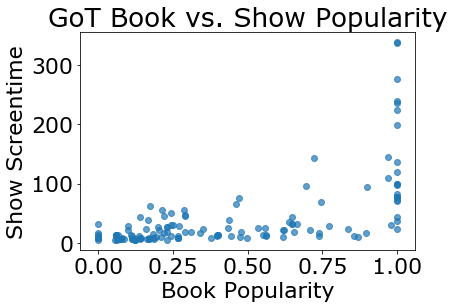

In [151]:
x = got_data.Minutes.values + 0
normal_screentime = norm1 = x / np.linalg.norm(x)

plt.scatter(got_data.book_popularity.values,got_data.Minutes.values, alpha=0.7)
plt.xlabel('Book Popularity')
plt.ylabel('Show Screentime')
plt.title('GoT Book vs. Show Popularity')
plt.show()

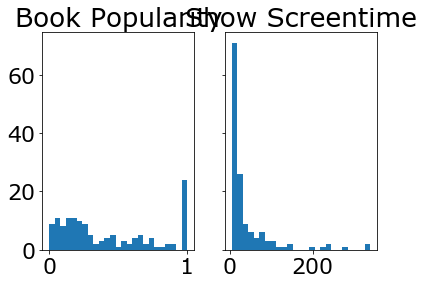

In [152]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(got_data.book_popularity.values, bins=25)
ax1.set_title('Book Popularity')
ax2.hist(got_data.Minutes.values, bins=25)
ax2.set_title('Show Screentime')
plt.show()

In [153]:
got_data['movie_popularity'] = normal_screentime

got_data['bigger_in_book'] = got_data['book_popularity'] - got_data['movie_popularity']

In [154]:
got_data.sort_values('bigger_in_book').head(10)

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book
40,Yara Greyjoy,32,False,False,0.00,NaN,0.037039,-0.037039
71,Lysa Arryn*,17,True,False,0.00,27.0,0.019677,-0.019677
84,Septa Unella,13,False,False,0.00,NaN,0.015047,-0.015047
94,Robin Arryn,11,False,False,0.00,NaN,0.012732,-0.012732
104,Archmaester Ebrose,9,False,False,0.00,NaN,0.010417,-0.010417
108,The Night King,8,False,True,0.00,NaN,0.009260,-0.009260
111,Yezzan zo Qaggaz,8,False,False,0.00,NaN,0.009260,-0.009260
106,Olyvar,8,False,False,0.00,NaN,0.009260,-0.009260
138,Armeca,5,False,False,0.00,NaN,0.005787,-0.005787
77,Locke*,13,True,False,0.06,26.0,0.015047,0.044953


In [155]:
got_data.sort_values('bigger_in_book',ascending=False).head(25)

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book
58,Renly Baratheon*,24,True,False,1.000000,35.0,0.027779,0.972221
38,Barristan Selmy*,37,True,False,1.000000,44.0,0.042827,0.957173
34,Tommen Baratheon*,43,True,False,1.000000,60.0,0.049771,0.950229
44,Roose Bolton*,30,True,False,0.979933,52.0,0.034724,0.945209
23,Joffrey Baratheon*,70,True,False,1.000000,22.0,0.081023,0.918977
22,Stannis Baratheon*,73,True,False,1.000000,50.0,0.084496,0.915504
20,Robb Stark*,77,True,False,1.000000,19.0,0.089126,0.910874
19,Margaery Tyrell*,78,True,False,1.000000,60.0,0.090283,0.909717
18,Tywin Lannister*,78,True,False,1.000000,30.0,0.090283,0.909717
17,Catelyn Stark*,83,True,False,1.000000,19.0,0.096071,0.903929


In [156]:
got_data['DeathValue'] = round(
    (got_data['Minutes']+2*got_data['Ep'])
    /got_data['Ep']*got_data['book_popularity'],3)
got_data.head()

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book,DeathValue
0,Jon Snow,338,False,True,1.0,NaN,0.391227,0.608773,NaN
1,Tyrion Lannister,337,False,True,1.0,NaN,0.390070,0.609930,NaN
2,Daenerys Targaryen,276,False,True,1.0,NaN,0.319463,0.680537,NaN
3,Sansa Stark,239,False,True,1.0,NaN,0.276637,0.723363,NaN
4,Cersei Lannister,236,False,False,1.0,NaN,0.273164,0.726836,NaN


In [157]:
def winterfell_potential(row):
    if row['8.3']:
        ltv = round((row['Minutes']+(144/70)+2*69)/70*row['book_popularity'],3)
    else:
        ltv = None
    return(ltv)
got_data['8.3_value'] = got_data.apply (lambda row: winterfell_potential(row), axis=1)
got_data[got_data['8.3_value'] > 0][['Character','8.3_value']].sort_values('8.3_value',ascending=False)

,Character,8.3_value
0,Jon Snow,6.829
1,Tyrion Lannister,6.815
2,Daenerys Targaryen,5.944
3,Sansa Stark,5.415
5,Arya Stark,5.201
6,Jaime Lannister,4.844
9,Theon Greyjoy,3.944
7,Samwell Tarly,3.936
11,Davos Seaworth,3.465
13,Bran Stark,3.415


In [158]:
sum(got_data[got_data['8.3_value'] > 0]['8.3_value'].values)

69.24200000000002

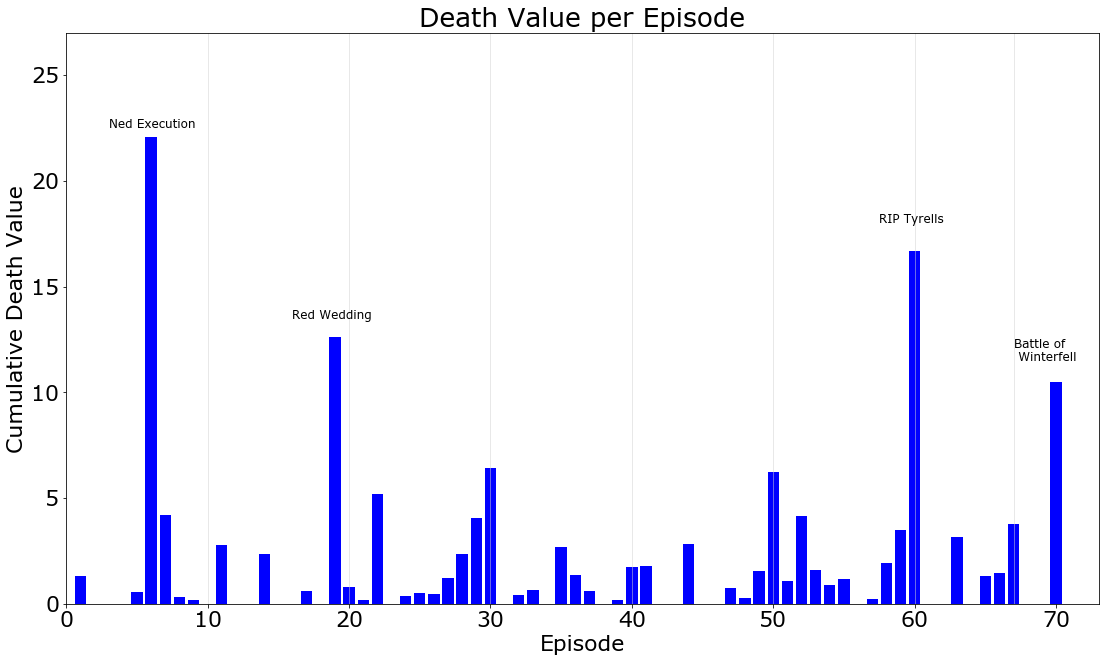

In [159]:
ned_vis_execution = 6
ned_vis_score = 21

red_wedding = 19
red_wedding_score = 13

wilding_invasion = 29
wilding_score =8

stannis_myrcella = 50
stannis_score = 8

tyrell_death = 60
tyrell_score = 17

winterfell_deaths = ['Eddison Tollett','Beric Dondarrion','Lyanna Mormont','Theon Greyjoy','Melisandre','Jorah Mormont']
winterfell_val = 0
for person in winterfell_deaths:
    winterfell_val += got_data[got_data['Character'] == person]['8.3_value'].values[0]

    
death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='blue')
plt.bar([70],[winterfell_val],color='blue')
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('Death Value per Episode')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(tyrell_death-2.5,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.text(70-3,winterfell_val+1,'Battle of\n Winterfell', fontsize=12)
plt.savefig('got_83.png')
plt.show()

In [160]:
# What if....
got_data.head()

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book,DeathValue,8.3_value
0,Jon Snow,338,False,True,1.0,NaN,0.391227,0.608773,NaN,6.829
1,Tyrion Lannister,337,False,True,1.0,NaN,0.390070,0.609930,NaN,6.815
2,Daenerys Targaryen,276,False,True,1.0,NaN,0.319463,0.680537,NaN,5.944
3,Sansa Stark,239,False,True,1.0,NaN,0.276637,0.723363,NaN,5.415
4,Cersei Lannister,236,False,False,1.0,NaN,0.273164,0.726836,NaN,NaN


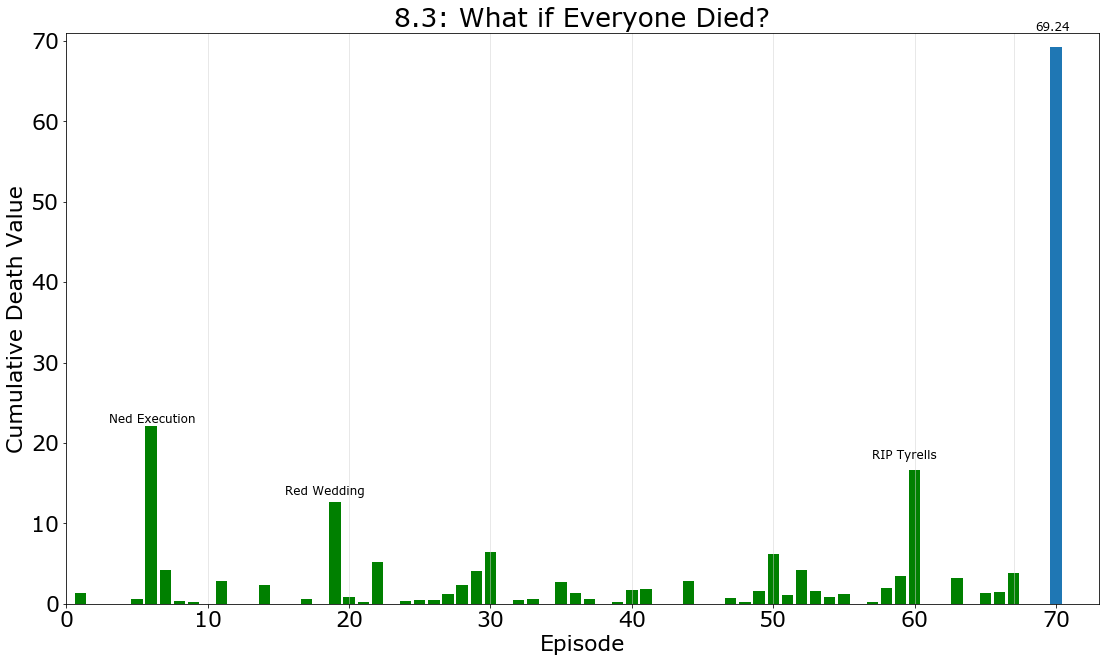

In [161]:
# Everyone Died?
ned_vis_execution = 6
ned_vis_score = 21

red_wedding = 19
red_wedding_score = 13

wilding_invasion = 29
wilding_score =8

stannis_myrcella = 50
stannis_score = 8

tyrell_death = 60
tyrell_score = 17

winterfell_val = sum(got_data[got_data['8.3_value'] > 0]['8.3_value'].values)
    
death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,100],color='lightgrey',linewidth=0.5)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='green')
plt.bar([70],[winterfell_val])
plt.ylim(top=71)
plt.xlim([0,73])
plt.title('8.3: What if Everyone Died?')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3.5,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(tyrell_death-3,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.text(70-1.5,winterfell_val+2,str(round(winterfell_val,2)), fontsize=12)
plt.savefig('got_83everyone.png')
plt.show()

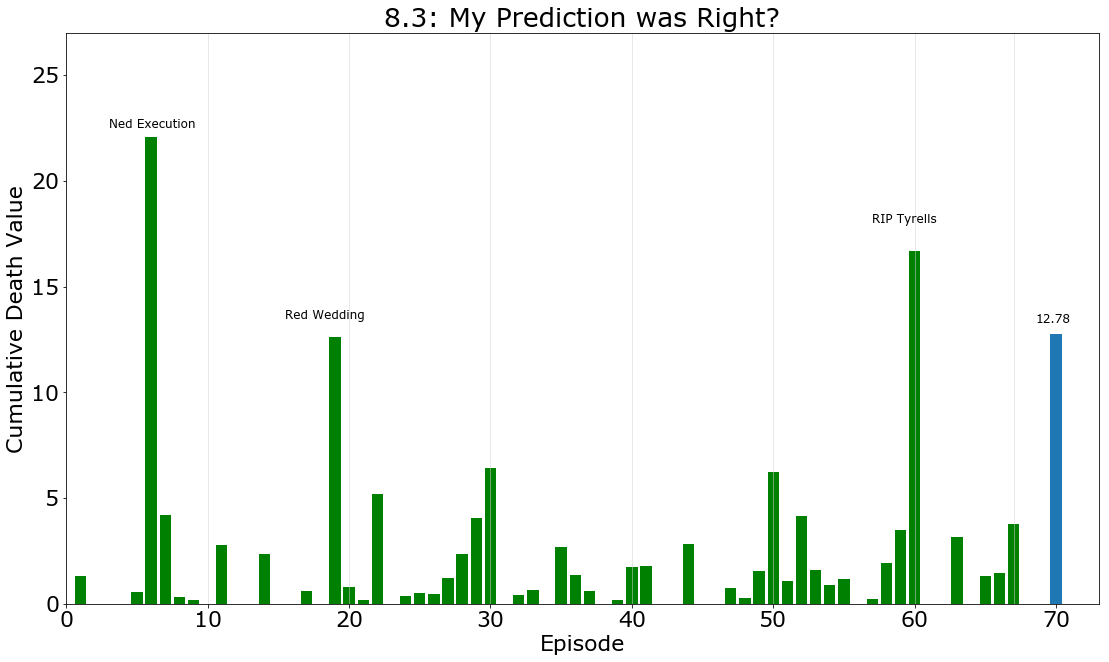

In [162]:
# My Prediction was Right?
ned_vis_execution = 6
ned_vis_score = 21

red_wedding = 19
red_wedding_score = 13

wilding_invasion = 29
wilding_score =8

stannis_myrcella = 50
stannis_score = 8

tyrell_death = 60
tyrell_score = 17

winterfell_deaths = ['Grey Worm','Beric Dondarrion','Theon Greyjoy','Brienne of Tarth','Jorah Mormont','Gendry']

winterfell_val = 0
for person in winterfell_deaths:
    winterfell_val += got_data[got_data['Character'] == person]['8.3_value'].values[0]
    
death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='green')
plt.bar([70],[winterfell_val])
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('8.3: My Prediction was Right?')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3.5,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(tyrell_death-3,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.text(70-1.5,winterfell_val+0.5,str(round(winterfell_val,2)), fontsize=12)
plt.savefig('got_83me.png')
plt.show()

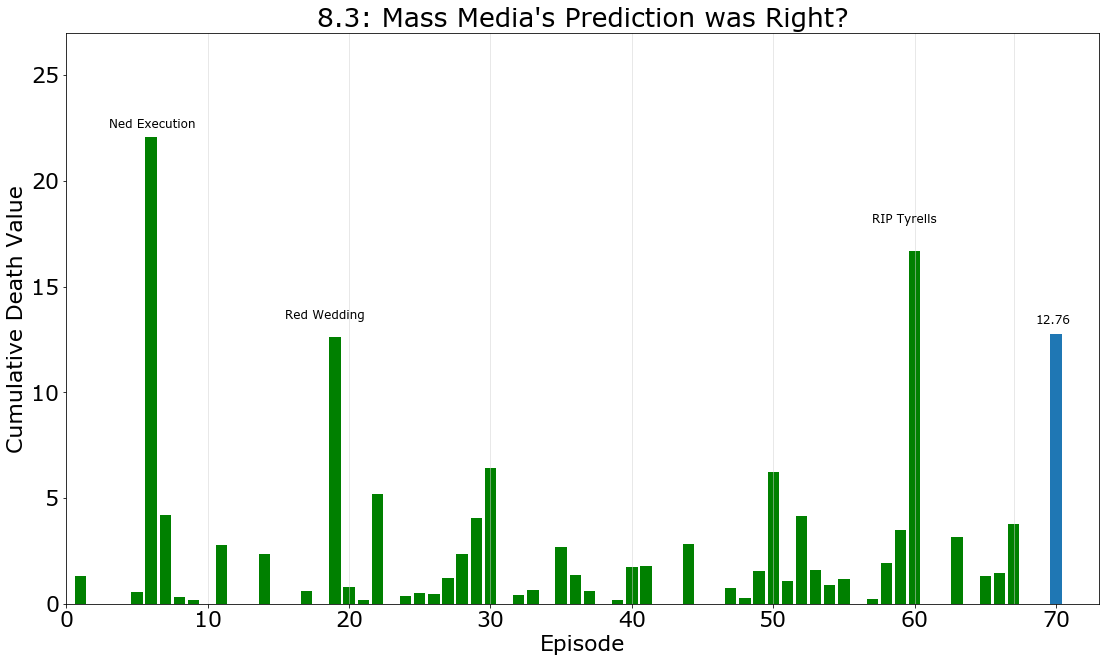

In [163]:
# The Vulture https://www.vulture.com/2019/04/game-of-thrones-battle-of-winterfell-who-will-die.html was right?

# My Prediction was Right?
ned_vis_execution = 6
ned_vis_score = 21

red_wedding = 19
red_wedding_score = 13

wilding_invasion = 29
wilding_score =8

stannis_myrcella = 50
stannis_score = 8

tyrell_death = 60
tyrell_score = 17

winterfell_deaths = ['Grey Worm','Theon Greyjoy','Eddison Tollett','Brienne of Tarth',
                     'Jorah Mormont','Gendry', 'Podrick Payne']
winterfell_val = 0
for person in winterfell_deaths:
    winterfell_val += got_data[got_data['Character'] == person]['8.3_value'].values[0]
    
death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='green')
plt.bar([70],[12.76])
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('8.3: Mass Media\'s Prediction was Right?')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3,ned_vis_score+1.5, 'Ned Execution',fontsize=12)
plt.text(red_wedding-3.5,red_wedding_score+0.5, 'Red Wedding',fontsize=12)
plt.text(tyrell_death-3,tyrell_score+1, 'RIP Tyrells',fontsize=12)
plt.text(70-1.5,winterfell_val+0.5,str(round(winterfell_val,2)), fontsize=12)
plt.savefig('got_83media.png')
plt.show()

In [164]:
# Both Mass Media and I had pretty similar predictions-- a blood bath around the scale of the Red Wedding
# But the reality was slightly less than ideal...
print(round(100*(12.88-10.56)/12.88,2),'% less deadly than expected')

18.01 % less deadly than expected


In [165]:
got_data.head()

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book,DeathValue,8.3_value
0,Jon Snow,338,False,True,1.0,NaN,0.391227,0.608773,NaN,6.829
1,Tyrion Lannister,337,False,True,1.0,NaN,0.390070,0.609930,NaN,6.815
2,Daenerys Targaryen,276,False,True,1.0,NaN,0.319463,0.680537,NaN,5.944
3,Sansa Stark,239,False,True,1.0,NaN,0.276637,0.723363,NaN,5.415
4,Cersei Lannister,236,False,False,1.0,NaN,0.273164,0.726836,NaN,NaN


In [166]:
def endgame_potential(row):
    dead_now = ['Eddison Tollett','Beric Dondarrion','Lyanna Mormont','Theon Greyjoy','Melisandre','Jorah Mormont',
               'Cersei Lannister','Jaime Lannister','Varys','Sandor Clegane','Gregor Clegane','Euron Greyjoy',
               'Qyburn']
    if (not row['Dead']) and (row['Character'] not in dead_now):
        ltv = round((row['Minutes']+5*(row['Minutes']/67)+2*72)/73*row['book_popularity'],3)
    else:
        ltv = None
    return(ltv)

def klanding_potential(row):
    dead_now = ['Eddison Tollett','Beric Dondarrion','Lyanna Mormont','Theon Greyjoy','Melisandre','Jorah Mormont']
    if (not row['Dead']) and (row['Character'] not in dead_now):
        ltv = round((row['Minutes']+5*(row['Minutes']/67)+2*71)/72*row['book_popularity'],3)
    else:
        ltv = None
    return(ltv)

def four_potential(row):
    dead_now = ['Eddison Tollett','Beric Dondarrion','Lyanna Mormont','Theon Greyjoy','Jorah Mormont']
    if (not row['Dead']) and (row['Character'] not in dead_now):
        ltv = round((row['Minutes']+5*(row['Minutes']/67)+2*70)/71*row['book_popularity'],3)
    else:
        ltv = None
    return(ltv)

got_data['8.4_value'] = got_data.apply (lambda row: four_potential(row), axis=1)
got_data['8.5_value'] = got_data.apply (lambda row: klanding_potential(row), axis=1)
got_data['8.6_value'] = got_data.apply (lambda row: endgame_potential(row), axis=1)
got_data[got_data['8.6_value'] > 0][['Character','8.6_value']].sort_values('8.6_value', ascending=False).reset_index()\
        .drop('index',axis=1)

,Character,8.6_value
0,Jon Snow,6.948
1,Tyrion Lannister,6.934
2,Daenerys Targaryen,6.036
3,Sansa Stark,5.491
4,Arya Stark,5.270
5,Samwell Tarly,3.969
6,Davos Seaworth,3.484
7,Bran Stark,3.430
8,Brienne of Tarth,3.415
9,Edmure Tully,1.467


In [167]:
got_data.to_csv('got_data_full.csv')

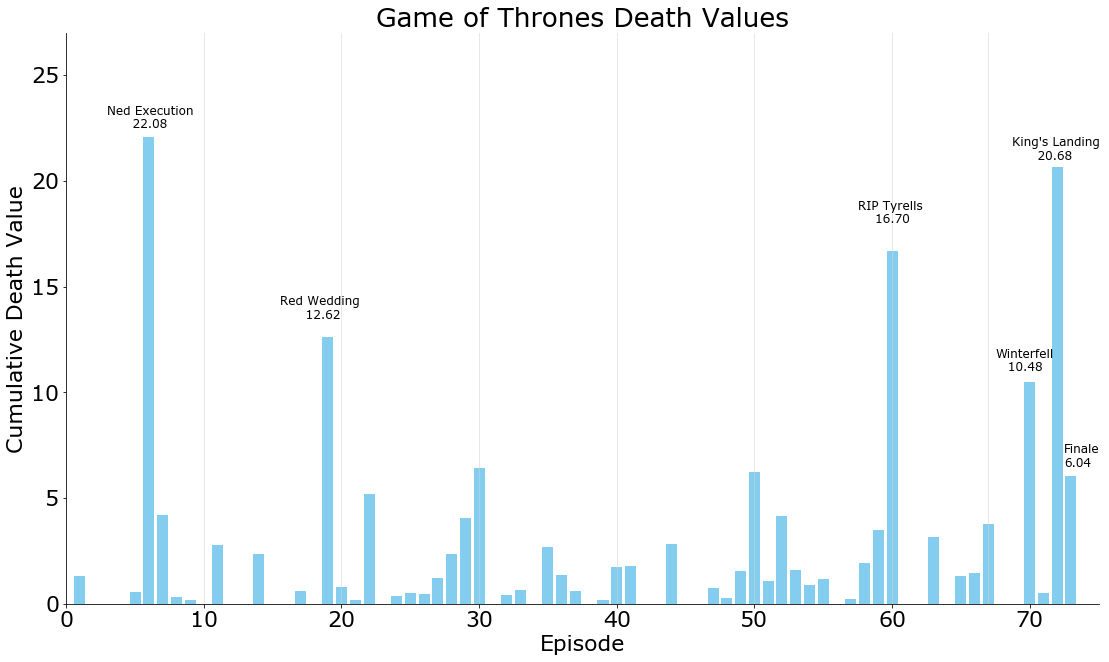

In [168]:
# Everyone Died?
ned_vis_execution = 6
ned_vis_score = 21

red_wedding = 19
red_wedding_score = 13

wilding_invasion = 29
wilding_score =8

stannis_myrcella = 50
stannis_score = 8

tyrell_death = 60
tyrell_score = 17

winterfell_deaths = ['Eddison Tollett','Beric Dondarrion','Lyanna Mormont','Theon Greyjoy','Melisandre','Jorah Mormont']
winterfell_val = 0
for person in winterfell_deaths:
    winterfell_val += got_data[got_data['Character'] == person]['8.3_value'].values[0]

four_deaths = ['Missandei']
four_val = 0
for person in four_deaths:
    four_val += got_data[got_data['Character'] == person]['8.4_value'].values[0]

klanding_deaths = ['Cersei Lannister','Jaime Lannister','Varys','Sandor Clegane','Gregor Clegane',
                   'Euron Greyjoy','Qyburn']
klanding_val = 0
for person in klanding_deaths:
    klanding_val += got_data[got_data['Character'] == person]['8.5_value'].values[0]
    
finale_deaths = ['Daenerys Targaryen']
finale_val = 0
for person in finale_deaths:
    finale_val += got_data[got_data['Character'] == person]['8.6_value'].values[0]
    
death_val3 = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,100],color='lightgrey',linewidth=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.bar(death_val3.index,death_val3.values, label='DeathValue3',color='#84cdee')
plt.bar([70,71,72,73],[winterfell_val,four_val,klanding_val,finale_val],color='#84cdee')
plt.ylim(top=27)
plt.xlim([0,75])
plt.title('Game of Thrones Death Values')
plt.ylabel('Cumulative Death Value')
plt.xlabel('Episode')
plt.gcf().set_size_inches(18.5, 10.5)
plt.text(ned_vis_execution-3,ned_vis_score+1.5, 'Ned Execution\n      22.08',fontsize=12)
plt.text(red_wedding-3.5,red_wedding_score+0.5, 'Red Wedding\n      12.62',fontsize=12)
plt.text(tyrell_death-2.5,tyrell_score+1, 'RIP Tyrells\n    16.70',fontsize=12)
plt.text(67.5,11, 'Winterfell\n   10.48',fontsize=12)
plt.text(68.75,21, 'King\'s Landing\n      20.68',fontsize=12)
plt.text(72.5,6.5, 'Finale\n6.04',fontsize=12)
plt.savefig('gotfinaldeathscores.png')
plt.show()

In [190]:
for person in winterfell_deaths:
    got_data2.set_value(got_data2['Character'] == person,'Ep',70)
    print(person)
got_data2[got_data2['Character'] == 'Eddison Tollett']['Ep']

Eddison Tollett
Beric Dondarrion
Lyanna Mormont
Theon Greyjoy
Melisandre
Jorah Mormont


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


47    70
Name: Ep, dtype: object

In [189]:
got_data2.set_value(got_data2['Character'] == 'Eddison Tollett','Ep',10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book,DeathValue,8.3_value,8.4_value,8.5_value,8.6_value
47,Eddison Tollett,29,False,True,0.100334,10,0.033567,0.066768,,0.242,,,


In [206]:
import subprocess
def char_clean(row):
    if '*' in row['Character']:
        return(row['Character'][:-1])
    else:
        return(row['Character'])
got_data2 = got_data
got_data2['Character'] = got_data2.apply (lambda row: char_clean(row), axis=1)
got_data2 = got_data2.replace(np.nan, '', regex=True)

for person in winterfell_deaths:
    got_data2.set_value(got_data2['Character'] == person,'Ep',70)
for person in four_deaths:
    got_data2.set_value(got_data2['Character'] == person,'Ep',71)
for person in klanding_deaths:
    got_data2.set_value(got_data2['Character'] == person,'Ep',72)
for person in finale_deaths:
    got_data2.set_value(got_data2['Character'] == person,'Ep',73)
    
got_data2 = got_data2.drop(['movie_popularity','bigger_in_book'],axis=1)
got_data2 = got_data2.rename(index=str, columns={"book_popularity": "popularity"})
# got_data2.head()
got_data2.to_html('table.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 table.html table.png', shell=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0

In [47]:
value_list = got_data[got_data['8.6_value'] > 0][['Character','8.6_value']].sort_values('8.6_value', ascending=False).values[:20]
def death_combos(all_values_list,used_values_list):
    death_sum = sum([i[1] for i in used_values_list])
    
    if death_sum > 10.56:
        char_list = [i[0] for i in used_values_list]
        return(char_list)
    else:
        randguess = np.random.randint(0,len(all_values_list))
        used_values_list.append(all_values_list[randguess])
        
        return(death_combos(np.delete(all_values_list,[randguess,randguess+1]).reshape(len(all_values_list)-1,2),\
                            used_values_list))

In [48]:
got_data[got_data['book_popularity'] == 1.0].shape[0]

21

In [154]:
# Both Mass Media and I had pretty similar predictions-- a blood bath around the scale of the Red Wedding
# But the reality was slightly less than ideal...
print(round(100*(12.78-10.56)/12.88,2),'% less deadly than expected')

17.24 % less deadly than expected


# !!!!
# The Episode was objectively 17.24% worse than everyone expected
# !!!!

In [ ]:
# Something that would add to screentime that isn't accounted for is "off-screentime" wherein
# talking about the character who isn't physically in the scene will add the character's
# importance

## Lord of the Rings

In [90]:
# I want to add Star Wars Original Trilogy and 
# Lord of the Rings Directors Cut to the above graph
# Screentime of LoTR characters from https://www.imdb.com/list/ls036259945/
# (but actually https://www.jetpunk.com/quizzes/lord-of-the-rings-characters-by-screen-time)
# deaths were verified https://lotr.fandom.com/wiki/List_of_deaths_in_the_Lord_of_the_Rings_films
lotr_screen_time = {
    'Frodo Baggins':121,
    'Samwise Gamgee':78,
    'Aragorn':74,
    'Gandalf':71,
    'Pippin Took':50,
    'Merry Brandybuck':41,
    'Gollum':34, #dead
    'Legolas':31,
    'Gimli':31,
    'Théoden':24, #dead
    'Boromir':20, #dead
    'Éowyn':18,
    'Arwen':15,
    'Bilbo Baggins': 13,
    'Elrond':12,
    'Faramir':12,
    'Treebeard':10,
    'Saruman':9, #dead
    'Galadriel':8,
    'Éomer':8,
    'The Witch King':7, #dead
    'Denethor':6, #dead
    'Wormtongue':5, #dead
    'Gamling':4,
    'Sauron':4 #dead
}

fellowship = 178 #https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
towers = 179 # https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Two_Towers
king = 200 # https://en.wikipedia.org/wiki/The_Lord_of_the_Rings:_The_Return_of_the_King
lotr_run_time = fellowship+towers+king
print('LOTR Run Time:',lotr_run_time)
lotr_ep_length = round(lotr_run_time/73)
print('LOTR "Episode" Length:',lotr_ep_length)

178+179+138
# Now I'm going to have to watch LOTR to find the timestamps of all these deaths (oh no!)
# Got these by rewatching LOTRs! (original)
death_time = {
    'Boromir':164,
    'Gollum':524,
    'Théoden':495,
    'Saruman':372,
    'The Witch King':480,
    'Wormtongue':372,
    'Sauron':525,
    'Denethor':481,
    
    
}


LOTR Run Time: 557
LOTR "Episode" Length: 8


7.63013698630137

In [91]:
def is_alive_lotr(row):
    dead_list = ['Gollum','Théoden','Boromir','Saruman','The Witch King','Denethor',
                'Wormtongue','Sauron']
    if row['Character'] in dead_list:
        return False
    else:
        return True
    
def death_value(row):
    death_time_dict = {
    'Boromir':164,
    'Gollum':524,
    'Théoden':495,
    'Saruman':372,
    'The Witch King':480,
    'Wormtongue':372,
    'Sauron':525,
    'Denethor':481,
    
    
    }
    if row['is_alive']:
        dtime = 550
    else:
        dtime = death_time_dict[row['Character']]
        
    ep = np.floor(dtime/8)
    return(round((row['Screentime']+2*ep)/ep*1,3)) # I gave all LotR characters 1.0 popularity

def death_ep(row):
    if row['is_alive']:
        return None
    else:
        death_time_dict = {
        'Boromir':164,
        'Gollum':524,
        'Théoden':495,
        'Saruman':372,
        'The Witch King':480,
        'Wormtongue':372,
        'Sauron':525,
        'Denethor':481,


        }
        return(np.floor(death_time_dict[row['Character']]/8))

In [92]:
lotr_pd = pd.DataFrame()
lotr_pd['Character'] = list(lotr_screen_time.keys())
lotr_pd['Screentime'] = list(lotr_screen_time.values())
lotr_pd['is_alive'] = lotr_pd.apply (lambda row: is_alive_lotr(row), axis=1)
lotr_pd['death_value'] = lotr_pd.apply (lambda row: death_value(row), axis=1)
lotr_pd['death_ep'] = lotr_pd.apply (lambda row: death_ep(row), axis=1)
lotr_pd

,Character,Screentime,is_alive,death_value,death_ep
0,Frodo Baggins,121,True,3.779,NaN
1,Samwise Gamgee,78,True,3.147,NaN
2,Aragorn,74,True,3.088,NaN
3,Gandalf,71,True,3.044,NaN
4,Pippin Took,50,True,2.735,NaN
5,Merry Brandybuck,41,True,2.603,NaN
6,Gollum,34,False,2.523,65.0
7,Legolas,31,True,2.456,NaN
8,Gimli,31,True,2.456,NaN
9,Théoden,24,False,2.393,61.0


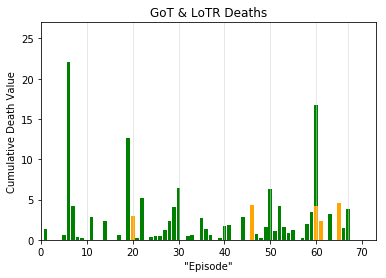

In [101]:
got_death = dead_people.groupby(['Ep'])['DeathValue3'].agg('sum')
lotr_death = lotr_pd.groupby(['death_ep'])['death_value'].agg('sum')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(got_death.index,got_death.values, label='GoT Deaths',color='green')
plt.bar(lotr_death.index,lotr_death.values, label='LoTR Deaths',color='orange')
plt.ylim(top=27)
plt.xlim([0,73])
plt.title('GoT & LoTR Deaths')
plt.ylabel('Cumulative Death Value')
plt.xlabel('"Episode"')
plt.show()

In [188]:
got_death = dead_people.groupby(['Ep'])['DeathValue3'].agg('mean')
lotr_death = lotr_pd.groupby(['death_ep'])['death_value'].agg('mean')
for eps in [10,20,30,40,50,60,67]:
    plt.plot([eps,eps],[0,30],color='lightgrey',linewidth=0.5)
plt.bar(got_death.index,got_death.values, label='GoT Deaths',color='green')
plt.bar(lotr_death.index,lotr_death.values, label='LoTR Deaths',color='orange')
plt.ylim(top=15)
plt.xlim([0,73])
plt.title('GoT & LoTR Deaths')
plt.ylabel('Average Death Value')
plt.xlabel('"Episode"')
plt.show()

NameError: name 'lotr_pd' is not defined

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


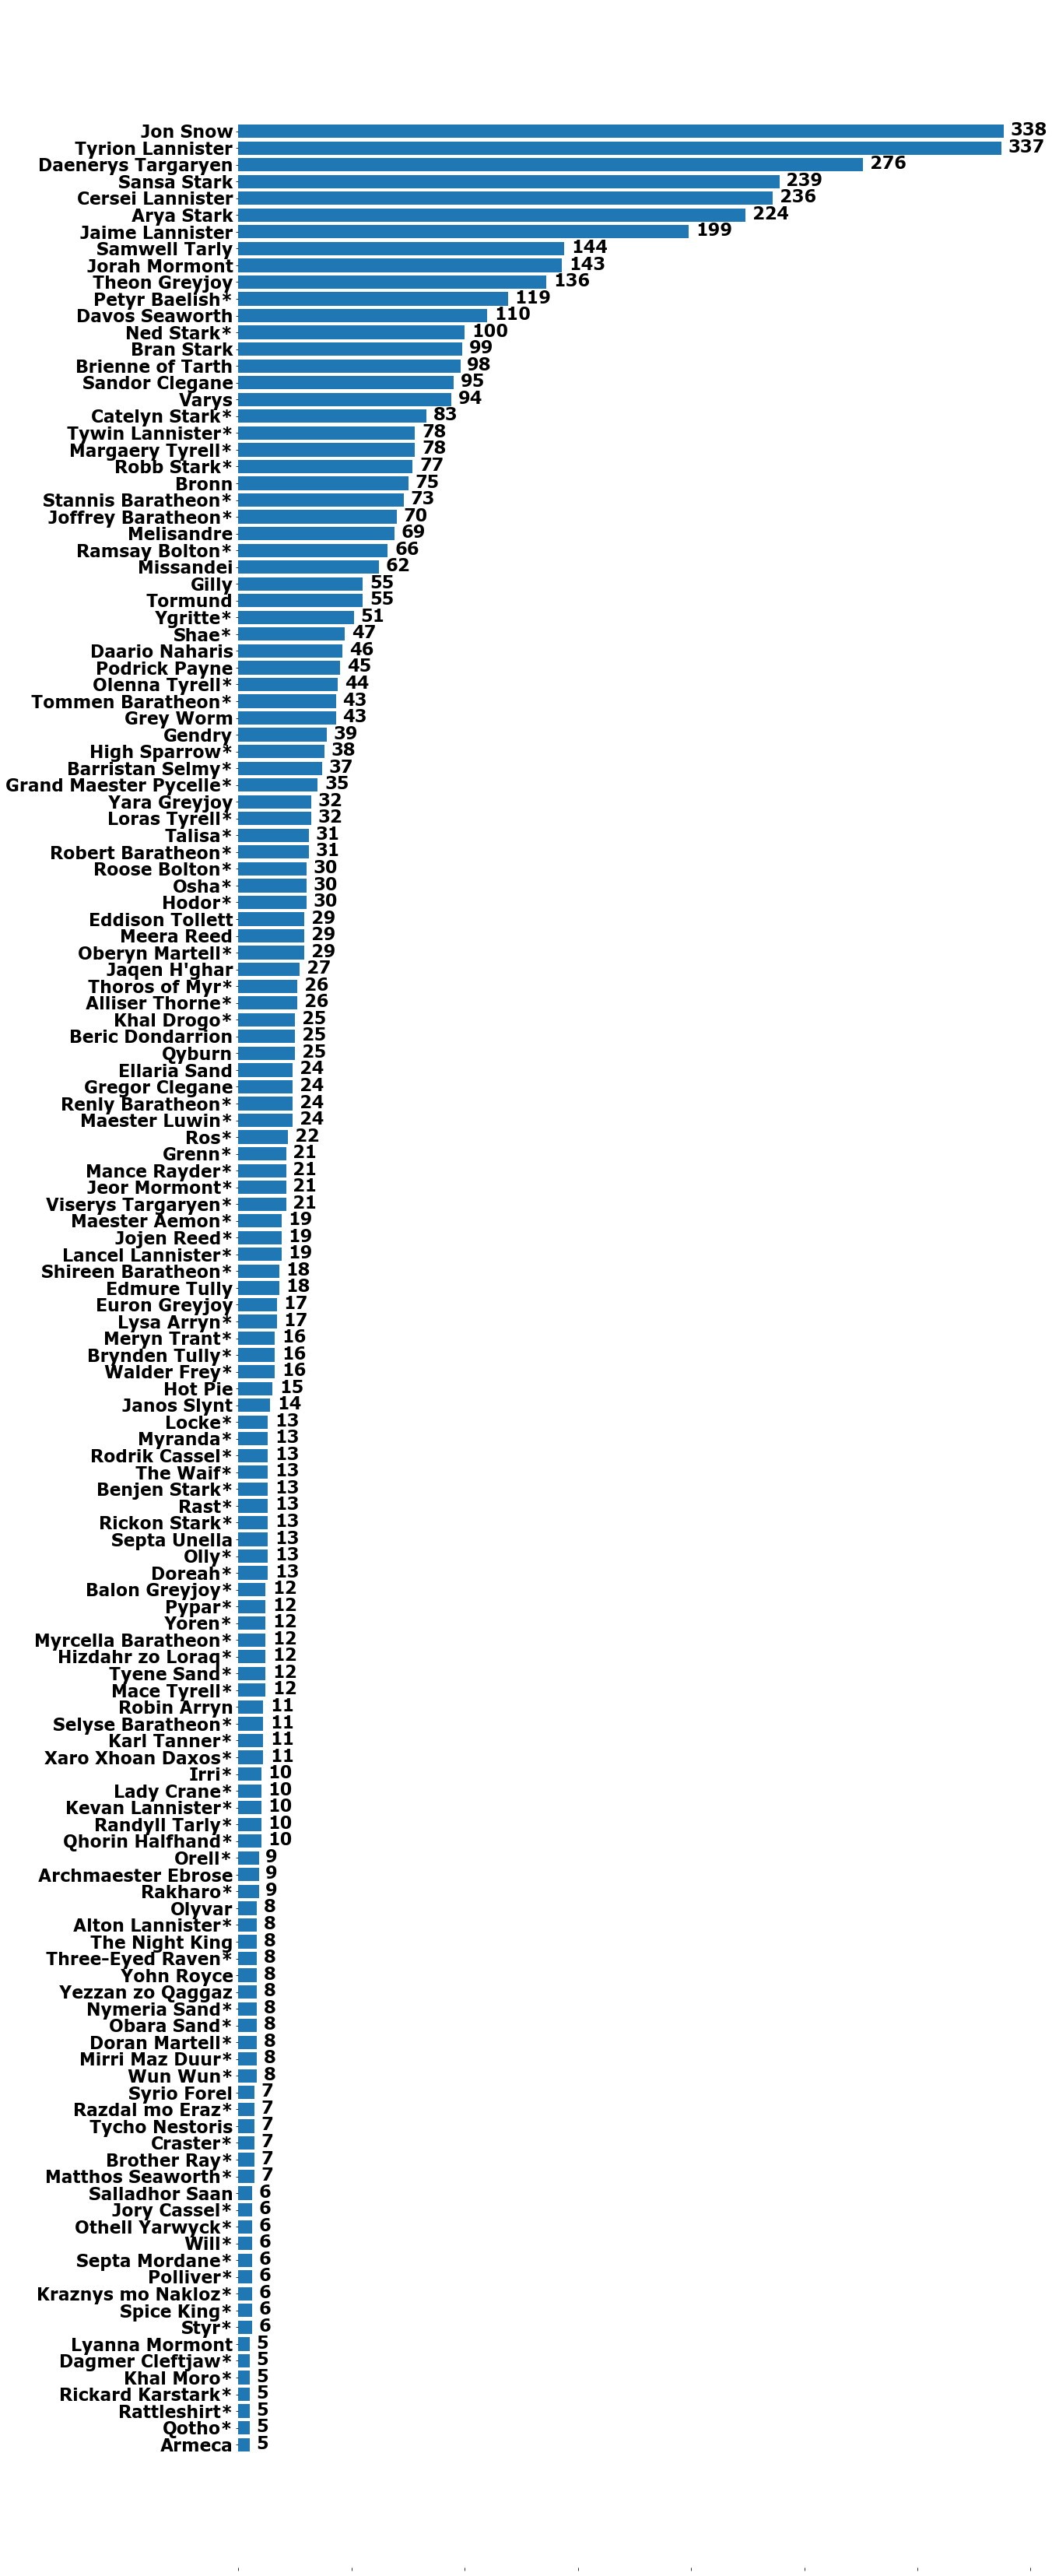

In [205]:
plt.barh(np.flip(got_data.Character.values),np.flip(got_data.Minutes.values),align='center')
plt.gcf().set_size_inches(18.5, 60.5)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
for i, v in enumerate(np.flip(got_data.Minutes.values)):
    ax.text(v + 3, i-0.25, str(v), fontweight='bold')
plt.savefig('gotscreentime.png')
plt.show()

In [181]:
np.flip(got_data.Character.values)

array(['Armeca', 'Qotho*', 'Rattleshirt*', 'Rickard Karstark*',
       'Khal Moro*', 'Dagmer Cleftjaw*', 'Lyanna Mormont', 'Styr*',
       'Spice King*', 'Kraznys mo Nakloz*', 'Polliver*', 'Septa Mordane*',
       'Will*', 'Othell Yarwyck*', 'Jory Cassel*', 'Salladhor Saan',
       'Matthos Seaworth*', 'Brother Ray*', 'Craster*', 'Tycho Nestoris',
       'Razdal mo Eraz*', 'Syrio Forel', 'Wun Wun*', 'Mirri Maz Duur*',
       'Doran Martell*', 'Obara Sand*', 'Nymeria Sand*',
       'Yezzan zo Qaggaz', 'Yohn Royce', 'Three-Eyed Raven*',
       'The Night King', 'Alton Lannister*', 'Olyvar', 'Rakharo*',
       'Archmaester Ebrose', 'Orell*', 'Qhorin Halfhand*',
       'Randyll Tarly*', 'Kevan Lannister*', 'Lady Crane*', 'Irri*',
       'Xaro Xhoan Daxos*', 'Karl Tanner*', 'Selyse Baratheon*',
       'Robin Arryn', 'Mace Tyrell*', 'Tyene Sand*', 'Hizdahr zo Loraq*',
       'Myrcella Baratheon*', 'Yoren*', 'Pypar*', 'Balon Greyjoy*',
       'Doreah*', 'Olly*', 'Septa Unella', 'Rickon Stark*

In [175]:
got_data.head()

,Character,Minutes,Dead,8.3,book_popularity,Ep,movie_popularity,bigger_in_book,DeathValue,8.3_value,8.6_value
0,Jon Snow,338,False,True,1.0,NaN,0.391227,0.608773,NaN,6.829,6.948
1,Tyrion Lannister,337,False,True,1.0,NaN,0.390070,0.609930,NaN,6.815,6.934
2,Daenerys Targaryen,276,False,True,1.0,NaN,0.319463,0.680537,NaN,5.944,6.036
3,Sansa Stark,239,False,True,1.0,NaN,0.276637,0.723363,NaN,5.415,5.491
4,Cersei Lannister,236,False,False,1.0,NaN,0.273164,0.726836,NaN,NaN,5.447


In [2]:
# https://www.digitalspy.com/movies/a861558/movie-extended-version-dvd-lord-of-the-rings-suicide-squad/


# Things that are left out of regular for extended are almost all character development, 
# but pertaining to death value:
    # Boromir + Faramir have a flashback
    # Witch King + Sauron get more screen time
    # Faramir's romance gets more screen time
    # Sauromans + Wormtounge's last scenes + deaths are in extension

In [511]:
# Avengers Screen Time: https://www.ign.com/articles/2019/05/04/which-avenger-most-screen-time-infinity-war-iron-man-captain-america